# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [2]:
from matplotlib import pyplot as plt
from matplotlib import cm

%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns

# Librerías de modelado
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

In [3]:
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]

In [4]:
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})

In [5]:
student_data.head(3)

,X,Y
0,17,10
1,51,1
2,27,5


Draw a dispersion diagram (scatter plot) for the data.

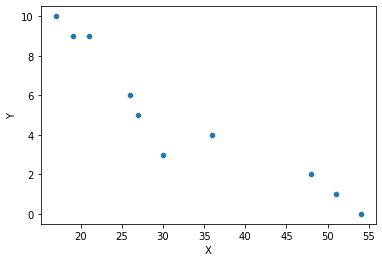

In [6]:
sns.scatterplot(x=student_data['X'], y=student_data['Y'], data=student_data);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [7]:
"""
There's seem to exist a negative trend between the two variables, the biggest
the age, the lesser tardies.
"""

"\nThere's seem to exist a negative trend between the two variables, the biggest\nthe age, the lesser tardies.\n"

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
student_data.corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [9]:
student_data.cov()

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


In [10]:
"""
The covariance indicates us the joint variability of the two variables, and in this case, as 
the covariances are negative, the variability is linear but in a negative way.
On the other hand the correlation coefficients indicate us the degree to which the 
variables are linearly related. In this case, there are highly related in a negtive way.
"""

'\nThe covariance indicates us the joint variability of the two variables, and in this case, as \nthe covariances are negative, the variability is linear but in a negative way.\nOn the other hand the correlation coefficients indicate us the degree to which the \nvariables are linearly related. In this case, there are highly related in a negtive way.\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(
     X = student_data[['X']],
     y = student_data.Y,
)

LinearRegression()

In [13]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
beta_1, beta_0

(-0.2428207709159808, 12.888803363135768)

Plot your regression model on your scatter plot.

In [14]:
x = np.linspace(10, 60, 100)

In [15]:
y = x*beta_1 + beta_0

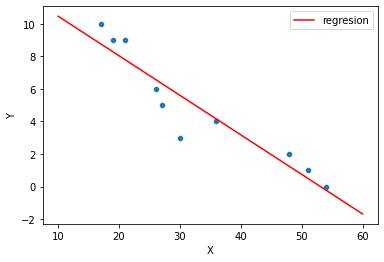

In [16]:
fig, ax = plt.subplots()
sns.scatterplot(x=student_data['X'], y=student_data['Y'], data=student_data)
ax.plot(x,y, color='red', label='regresion')
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [17]:
linear_model = smf.ols("Y ~ X", data=student_data).fit()
linear_model.summary() 

/home/julian/miniconda3/envs/ironcon/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           5.57e-05
Time:                        18:00:32   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
X             -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [18]:
vehicles = pd.read_csv('/home/julian/Cursos/Ironhack/Labs/lab-regression-analysis/vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [19]:
vehicles.shape

(35952, 15)

In [20]:
vehicles.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


In [21]:
vehicles.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


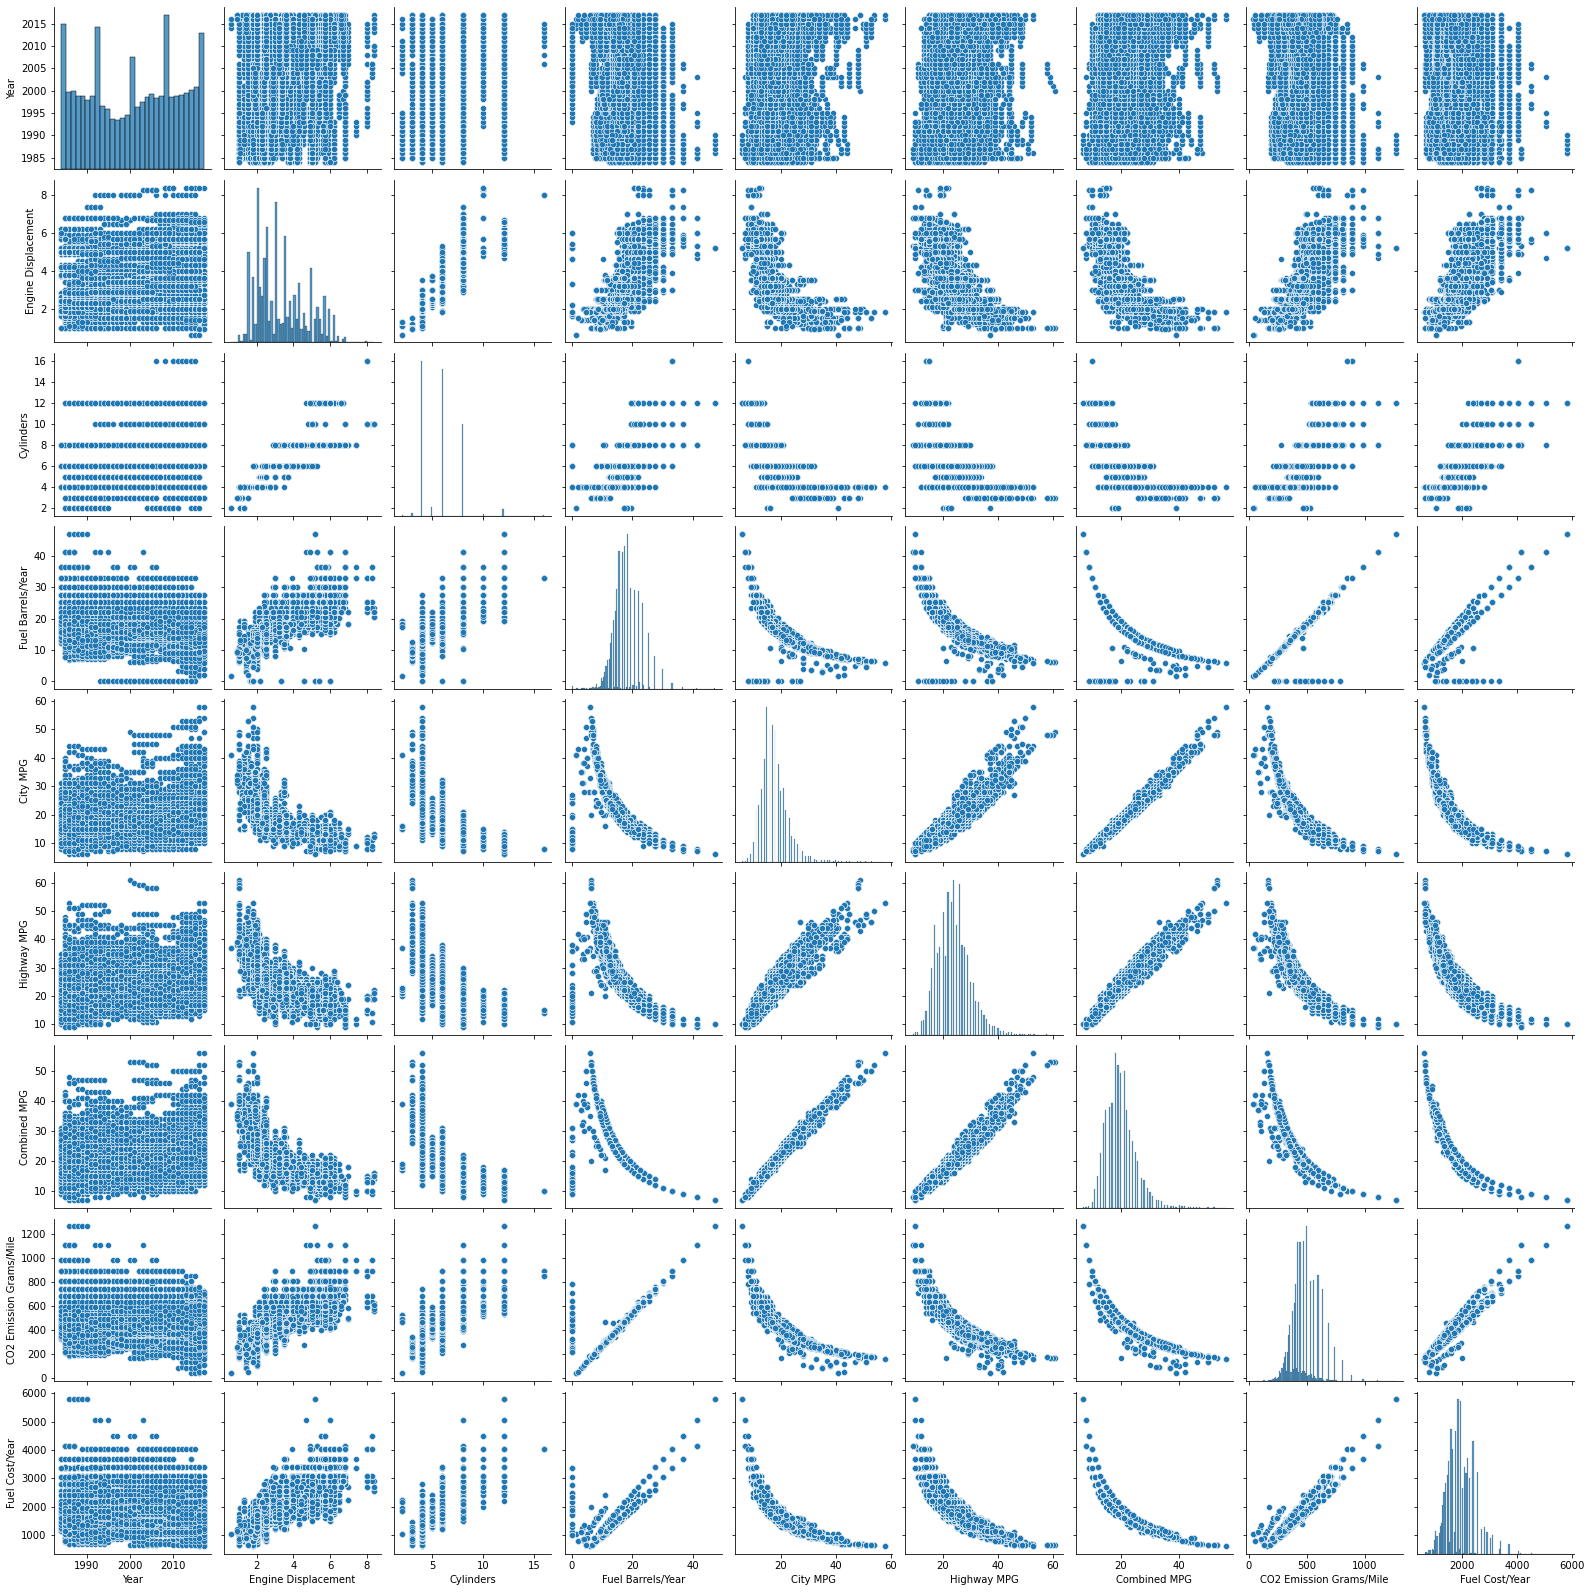

In [22]:
sns.pairplot(vehicles)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
#Q('Year') + Q('Cylinders') + Q('City MPG') + Q('Highway MPG') + Q('Fuel Cost/Year')

In [23]:
%%time
co2_model = smf.ols("Q('CO2 Emission Grams/Mile') ~ Q('Make') + Q('Model') + Q('Engine Displacement') + Q('Transmission') + Q('Drivetrain') + Q('Vehicle Class') + Q('Fuel Type') + Q('Fuel Barrels/Year') + Q('Combined MPG')", data=vehicles).fit()

CPU times: user 15min 1s, sys: 1min 34s, total: 16min 35s
Wall time: 2min 11s


In [25]:
co2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q('CO2 Emission Grams/Mile')   R-squared:                       1.000
Model:                                      OLS   Adj. R-squared:                  0.999
Method:                           Least Squares   F-statistic:                 1.783e+04
Date:                          Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                                  18:06:49   Log-Likelihood:                -85583.
No. Observations:                         35952   AIC:                         1.786e+05
Df Residuals:                             32210   BIC:                         2.104e+05
Df Model:                                  3741                                         
Covariance Type:                      nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       365.3279      3.084    118.456      0.000     359.283     371.373
Q('Make')[T.ASC Incorporated]                                     2.2111      1.472      1.502      0.133      -0.675       5.097
Q('Make')[T.Acura]                                                3.4393      1.005      3.421      0.001       1.469       5.410
Q('Make')[T.Alfa Romeo]                                           3.1608      1.047      3.019      0.003       1.109       5.213
Q('Make')[T.American Motors Corporation]                          1.2974      2.783      0.466      0.641      -4.157       6.752
Q('Make')[T.Aston Martin]                                         3.3324      1.077      3.094      0.002       1.221       5.444
Q('Make')[T.Audi]                                                 4.2944      2.405      1.785      0.074      -0.420       9.009
Q('Make')[T.Aurora Cars Ltd]                                      3.3969      2.976      1.141      0.254      -2.437       9.231
Q('Make')[T.Autokraft Limited]                                    2.4471      1.185      2.066      0.039       0.125       4.769
Q('Make')[T.BMW]                                                  1.9931      0.993      2.007      0.045       0.047       3.939
Q('Make')[T.BMW Alpina]                                           2.6531      1.325      2.003      0.045       0.057       5.250
Q('Make')[T.Bentley]                                              3.2394      3.747      0.865      0.387      -4.104      10.583
Q('Make')[T.Bertone]                                              1.9616      0.834      2.351      0.019       0.326       3.597
Q('Make')[T.Bill Dovell Motor Car Company]                        3.1554      1.472      2.144      0.032       0.270       6.041
Q('Make')[T.Bitter Gmbh and Co. Kg]                               2.2110      0.952      2.323      0.020       0.345       4.077
Q('Make')[T.Bugatti]                                             -5.3860      0.764     -7.048      0.000      -6.884      -3.888
Q('Make')[T.Buick]                                                0.6373      4.644      0.137      0.891      -8.465       9.739
Q('Make')[T.CCC Engineering]                                      1.9754      1.110      1.779      0.075      -0.201       4.152
Q('Make')[T.CX Automotive]                                        3.7323      1.128      3.308      0.001       1.521       5.944
Q('Make')[T.Cadillac]                                             2.7676      3.153      0.878      0.380      -3

In [1]:
#co2_model.summary(xname=['Make', 'Model', 'Engine Displacement', 'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type', 'Fuel Barrels/Year', 'Combined MPG'])

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
"""
There are a lot of p-values that are well above the alpha 0.05, so we could get rid of the variables
asociated with them. On the other hand, the R squared is too high, overfitting?.

"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [3]:
people = [1, 3, 4, 6, 8, 9, 11, 14]

In [6]:
unable = [1, 2, 4, 4, 5, 7, 8, 13]

In [7]:
party_data = pd.DataFrame({'X': people, 'Y': unable})

In [5]:
party_data.head(3)

,X,Y
0,17,10
1,51,1
2,27,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

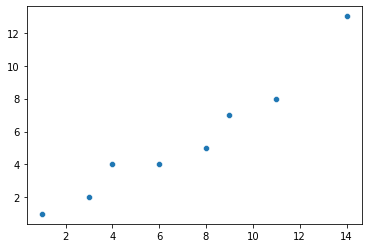

In [10]:
sns.scatterplot(x=people, y=unable, data=party_data);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
"""
There's a likley linear relationship between the two variables.
"""

In [11]:
linear_model1 = smf.ols("Y ~ X", data=party_data).fit()
linear_model1.summary() 

/home/julian/miniconda3/envs/ironcon/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           0.000102
Time:                        09:55:21   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

In [13]:
people2 = [1, 3, 4, 6, 8, 9, 11]

In [14]:
unable2 = [1, 2, 4, 4, 5, 7, 8]

In [15]:
party_data2 = pd.DataFrame({'X': people2, 'Y': unable2})

In [17]:
linear_model2 = smf.ols("Y ~ X", data=party_data2).fit()
linear_model2.summary() 

/home/julian/miniconda3/envs/ironcon/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           0.000264
Time:                        12:23:42   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3233      0.513      0.630      0.556      -0.996       1.642
X              0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 